In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
import yfinance as yf
# Set the stock symbol and date range
stock_symbol = "AAPL"
start_date = "2018-08-20"
end_date = "2023-08-20"

# Get the historical stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Save the data to a CSV file in the specified directory
csv_filename = r"D:\beautiful soup\apple stocks.csv"
stock_data.to_csv(csv_filename)

# Print a message indicating successful save
print(f"Stock data saved to: {csv_filename}")

[*********************100%%**********************]  1 of 1 completed
Stock data saved to: D:\beautiful soup\apple stocks.csv


In [109]:
df=pd.read_csv('/content/apple.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/20/2018,54.525002,54.794998,53.777500,53.865002,51.588326,121150800
1,8/21/2018,54.200001,54.297501,53.507500,53.759998,51.487755,104639200
2,8/22/2018,53.525002,54.090000,53.459999,53.762501,51.490158,76072400
3,8/23/2018,53.662498,54.262501,53.650002,53.872501,51.595505,75532800
4,8/24/2018,54.150002,54.224998,53.777500,54.040001,51.755936,73905600
...,...,...,...,...,...,...,...
1253,8/14/2023,177.970001,179.690002,177.309998,179.460007,179.460007,43675600
1254,8/15/2023,178.880005,179.479996,177.050003,177.449997,177.449997,43622600
1255,8/16/2023,177.130005,178.539993,176.500000,176.570007,176.570007,46964900
1256,8/17/2023,177.139999,177.509995,173.479996,174.000000,174.000000,66062900


In [110]:
df['Date']=pd.to_datetime(df["Date"])

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


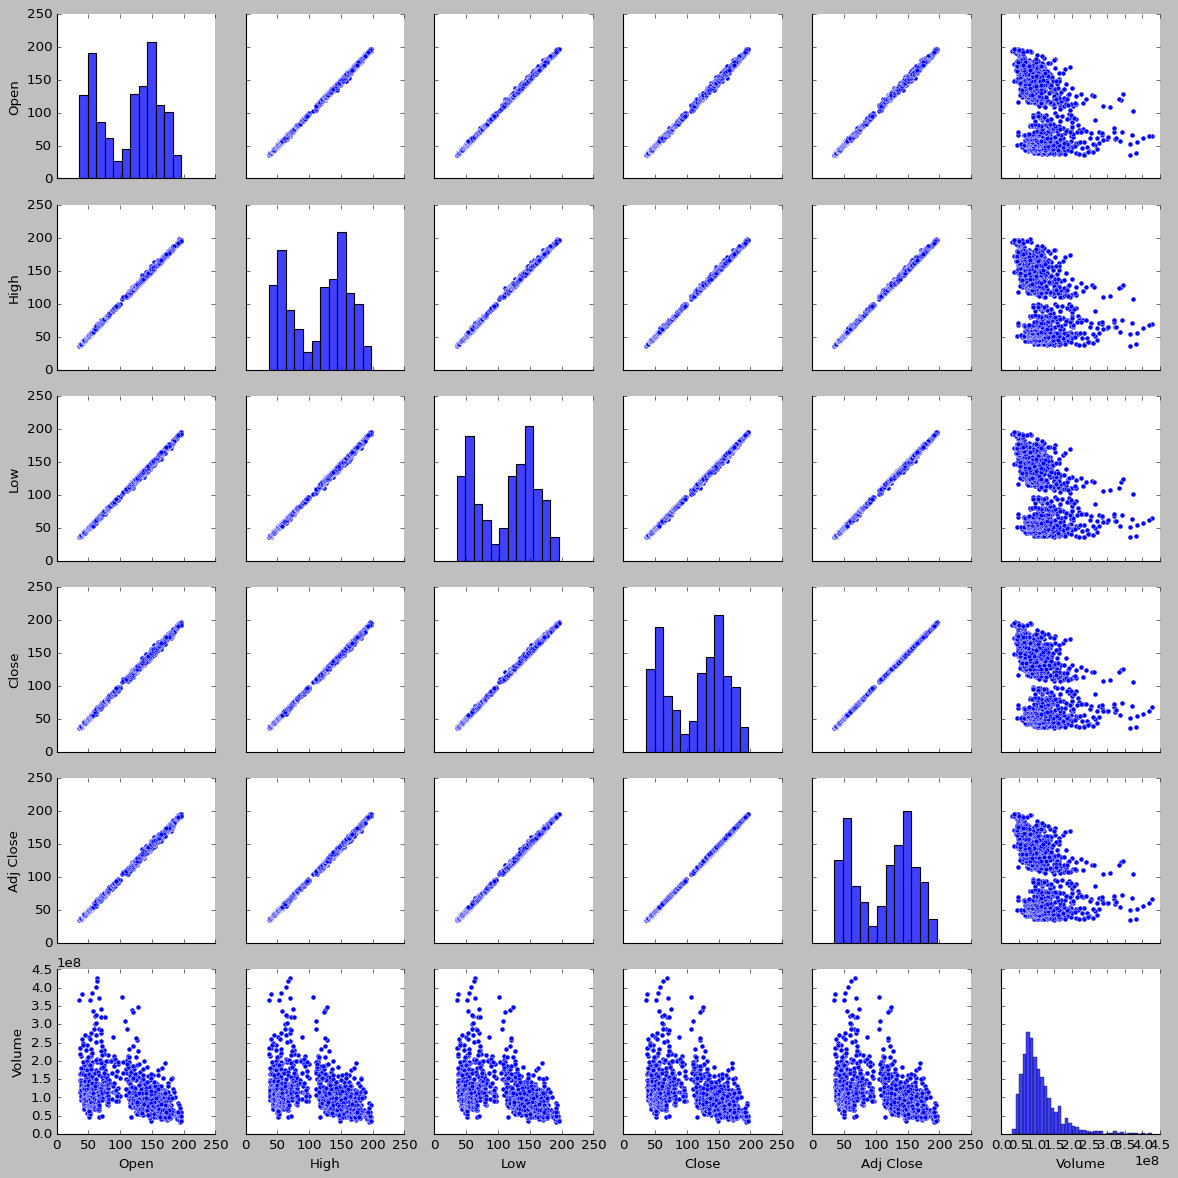

In [112]:
sns.pairplot(df)

In [113]:
df.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [114]:
df=df[['Date','Close']]

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Close   1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [116]:
df=df.set_index("Date")

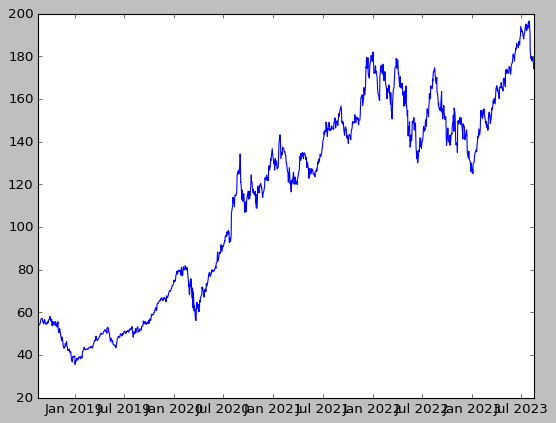

In [117]:
plt.plot(df.Close)

In [118]:
df.describe()

,Close
count,1258.000000
mean,113.377011
std,46.827588
min,35.547501
25%,62.500626
50%,126.314999
75%,150.715000
max,196.449997


(array([183., 170., 100.,  37.,  47., 155., 196., 183., 145.,  42.]),
 array([ 35.54750061,  51.63775024,  67.72799987,  83.8182495 ,
         99.90849913, 115.99874875, 132.08899838, 148.17924801,
        164.26949764, 180.35974727, 196.4499969 ]),
 <BarContainer object of 10 artists>)

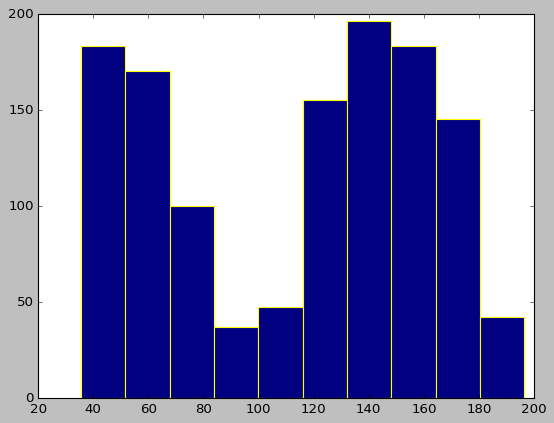

In [119]:
plt.hist(df.Close,color='navy',edgecolor='yellow')

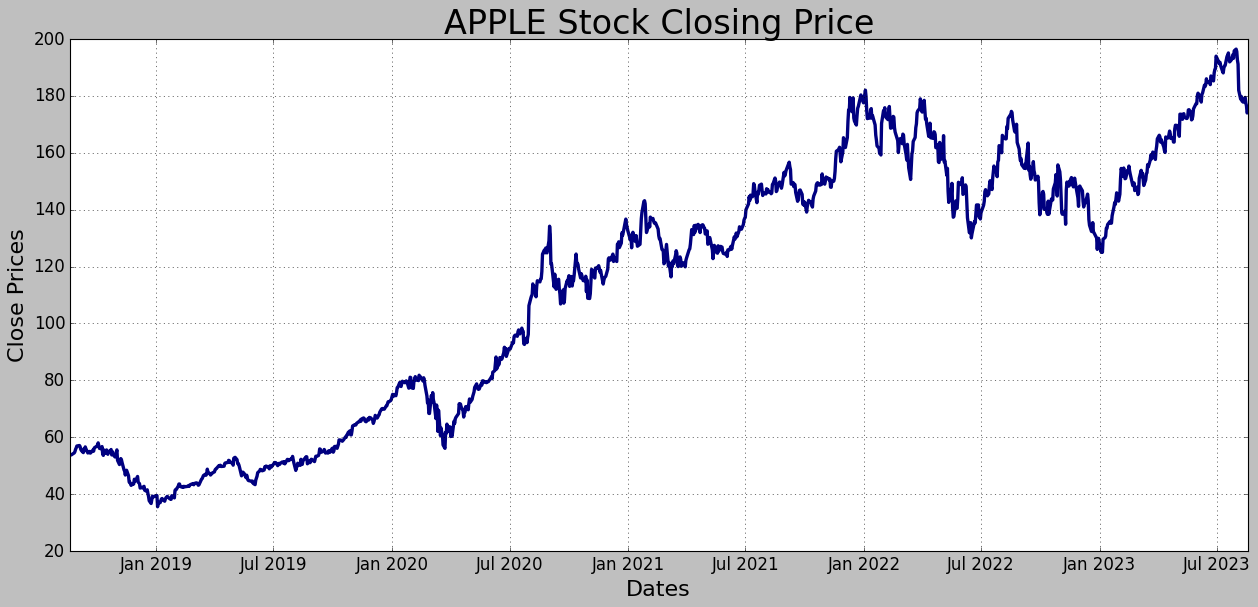

In [120]:
plt.style.use('classic')
plt.figure(figsize=(19,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(df['Close'], linewidth = 3, color = 'navy')
plt.title('APPLE Stock Closing Price', fontsize = 30)
plt.show()

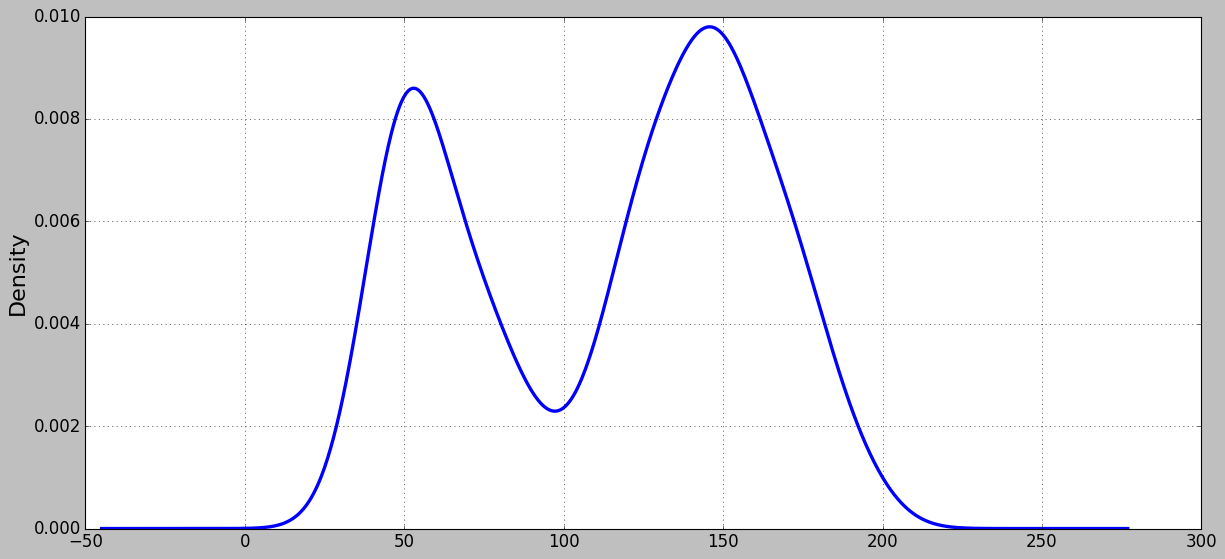

In [121]:
df_close = df['Close']
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [122]:
rolmean=df["Close"].rolling(48).mean()
rolstd=df["Close"].rolling(48).std()

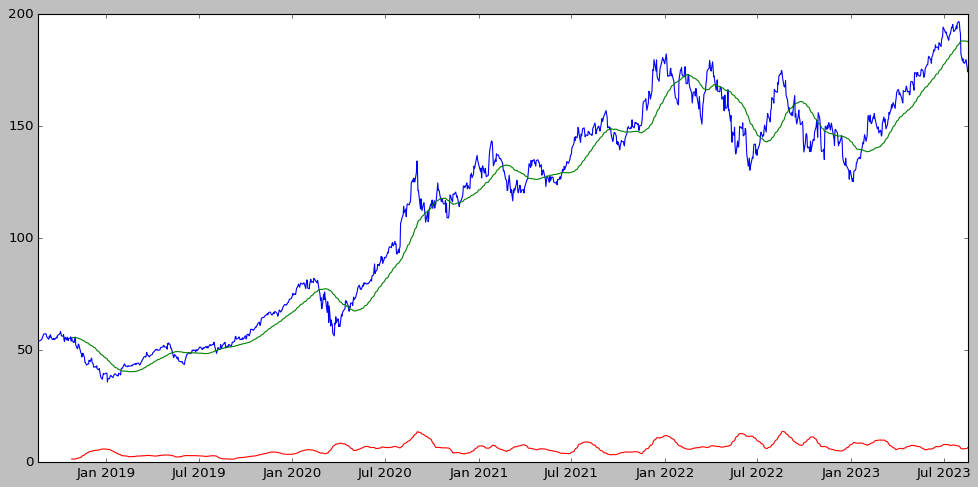

In [123]:
plt.figure(figsize=(15,7))
plt.plot(df.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [124]:
from statsmodels.tsa.stattools import adfuller
adft=adfuller(df["Close"])

In [125]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"])

test stats       -0.821814
p-value           0.812630
lag               1.000000
data points    1256.000000
dtype: float64

In [126]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

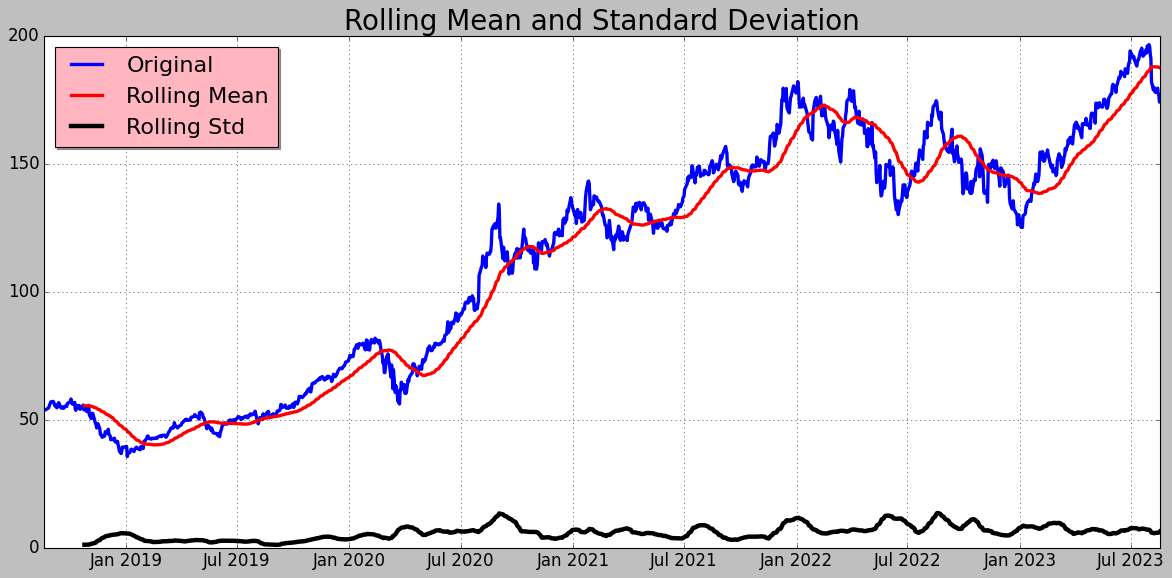

Results of dickey fuller test
Test Statistics                  -0.821814
p-value                           0.812630
No. of lags used                  1.000000
Number of observations used    1256.000000
critical value (1%)              -3.435567
critical value (5%)              -2.863844
critical value (10%)             -2.567997
dtype: float64


In [127]:
test_stationarity(stock_data.Close)

In [128]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df[["Close"]],period=12)

In [129]:
result.seasonal

Date
2018-08-20   -0.256569
2018-08-21    0.121367
2018-08-22   -0.042963
2018-08-23   -0.073350
2018-08-24   -0.056434
                ...   
2023-08-14   -0.127613
2023-08-15    0.221135
2023-08-16    0.100420
2023-08-17   -0.149351
2023-08-18    0.231128
Name: seasonal, Length: 1258, dtype: float64

<Figure size 1600x800 with 0 Axes>

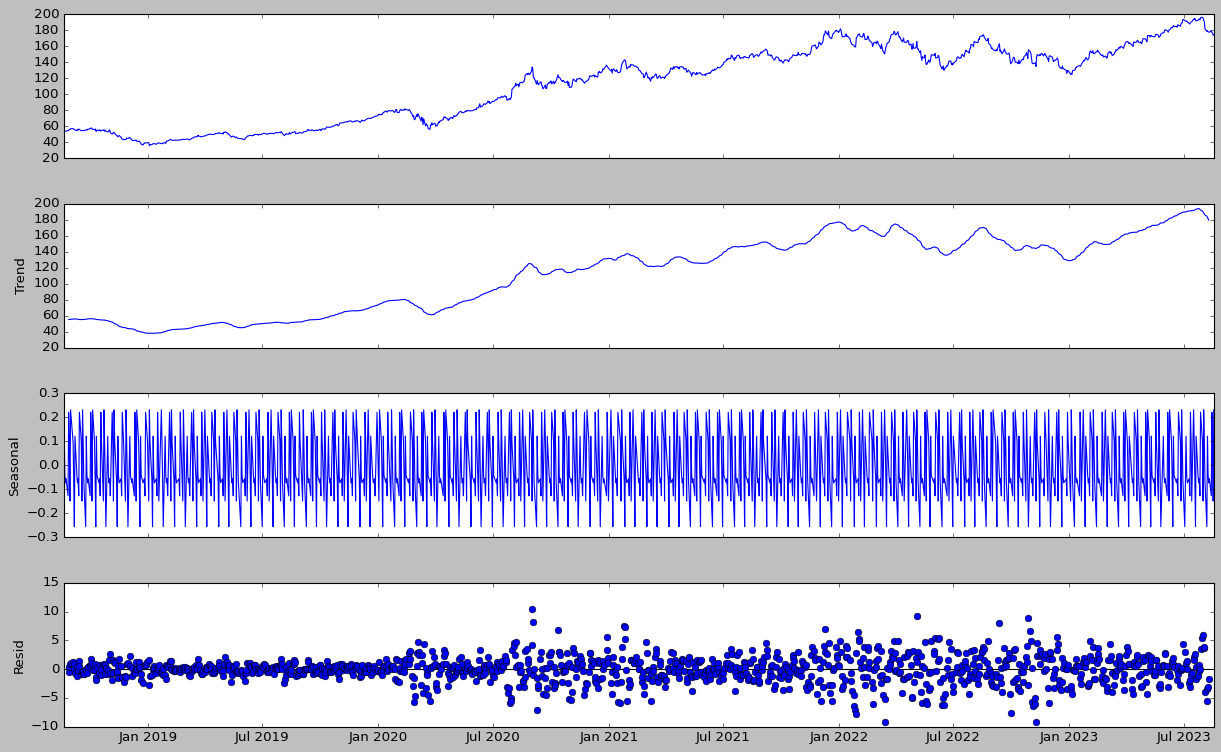

In [130]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df[["Close"]],period=12,model="multiplicative")

<Figure size 1600x800 with 0 Axes>

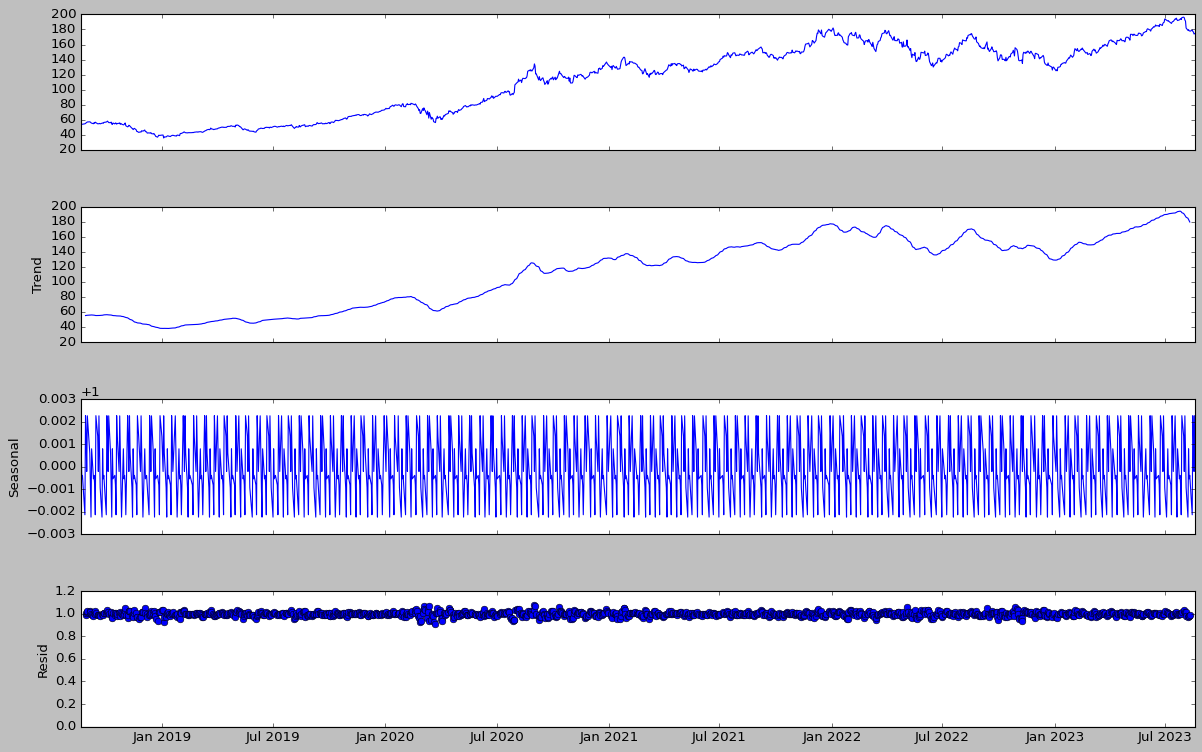

In [132]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Axes: >

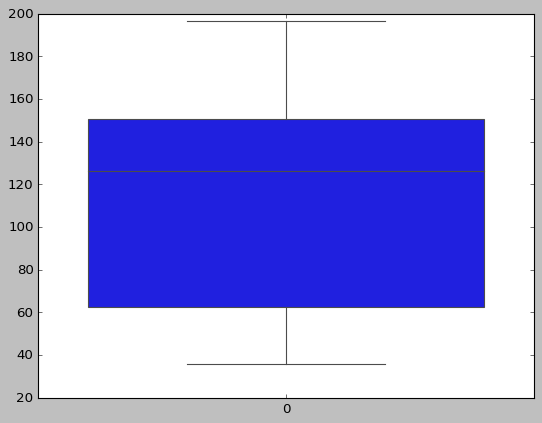

In [133]:
import seaborn as sns
sns.boxplot(df.Close)

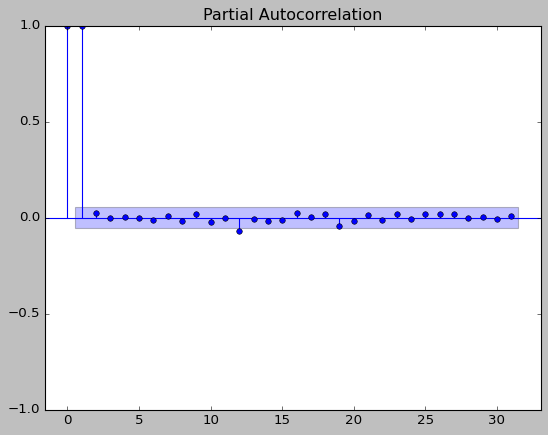

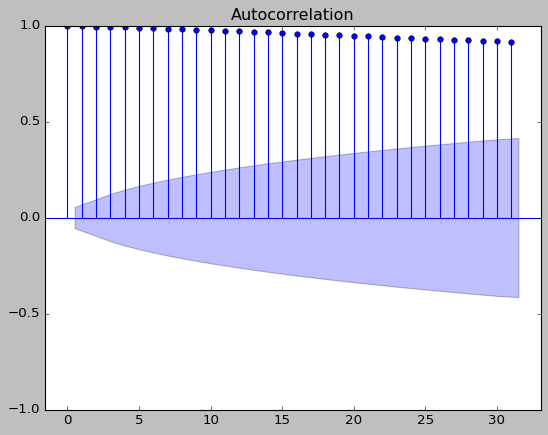

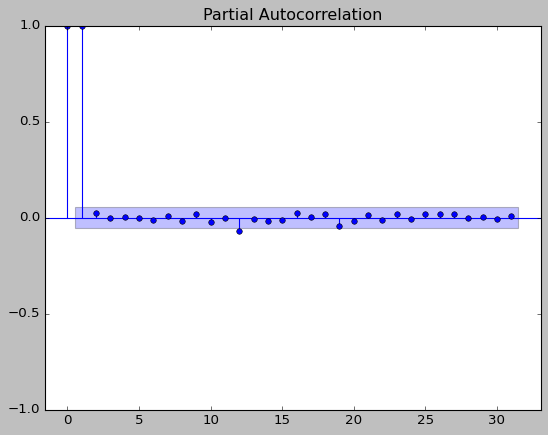

In [134]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df.Close)
plot_pacf(df.Close)

In [135]:
df_close=df['Close']
df_close=df_close.diff()

In [136]:
df_close.isnull().sum()
df_close=df_close.dropna()

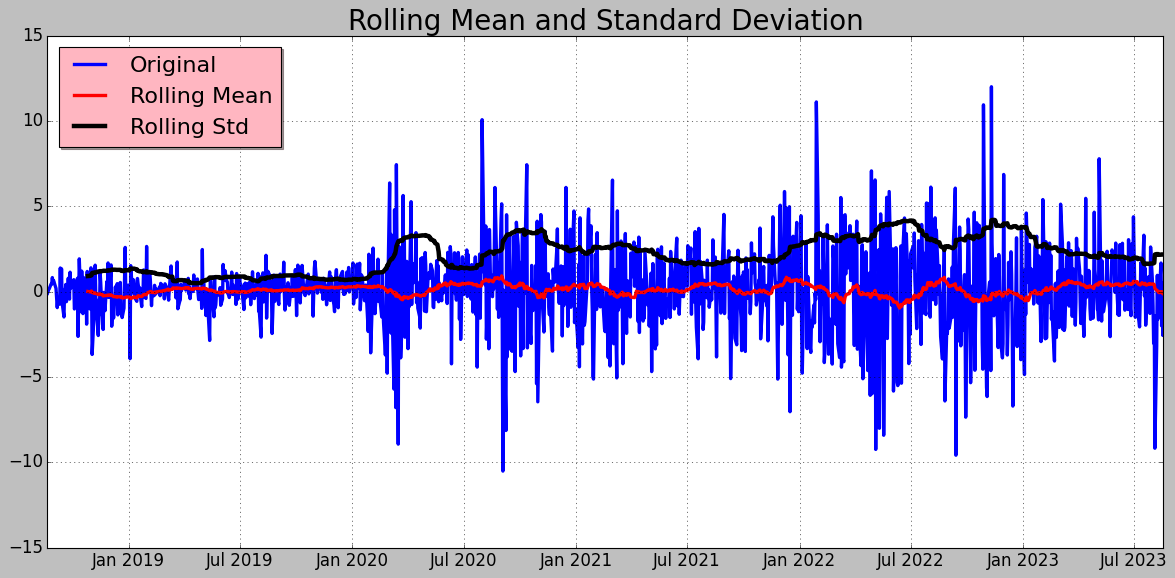

Results of dickey fuller test
Test Statistics                 -37.179839
p-value                           0.000000
No. of lags used                  0.000000
Number of observations used    1256.000000
critical value (1%)              -3.435567
critical value (5%)              -2.863844
critical value (10%)             -2.567997
dtype: float64


In [137]:
test_stationarity(df_close)

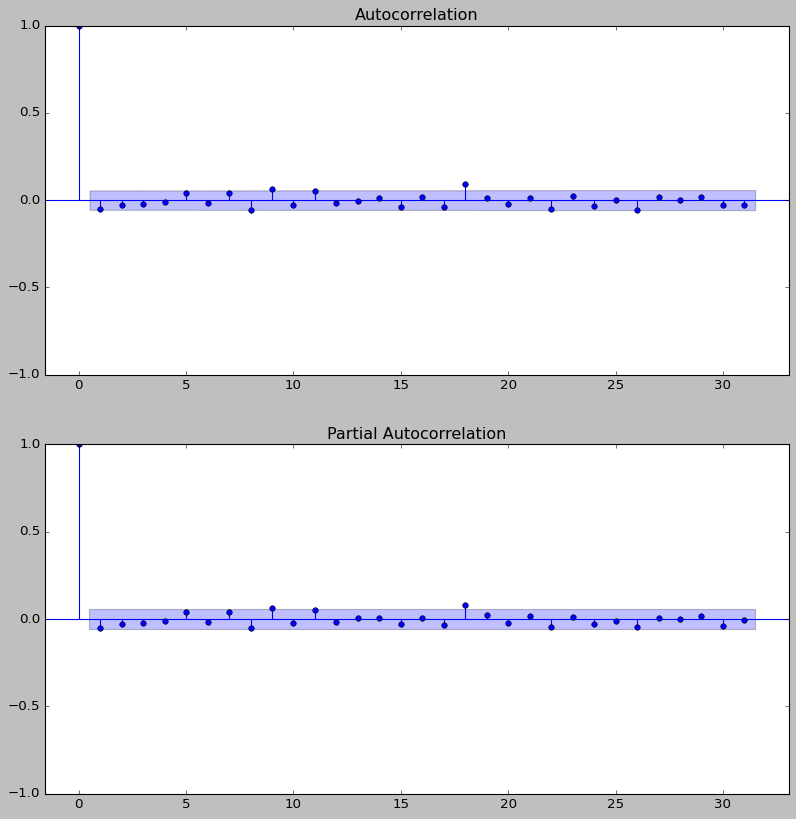

In [138]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(211)
fig=plot_acf(df_close,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_close,ax=ax2)

In [139]:
df_close.shape

(1257,)

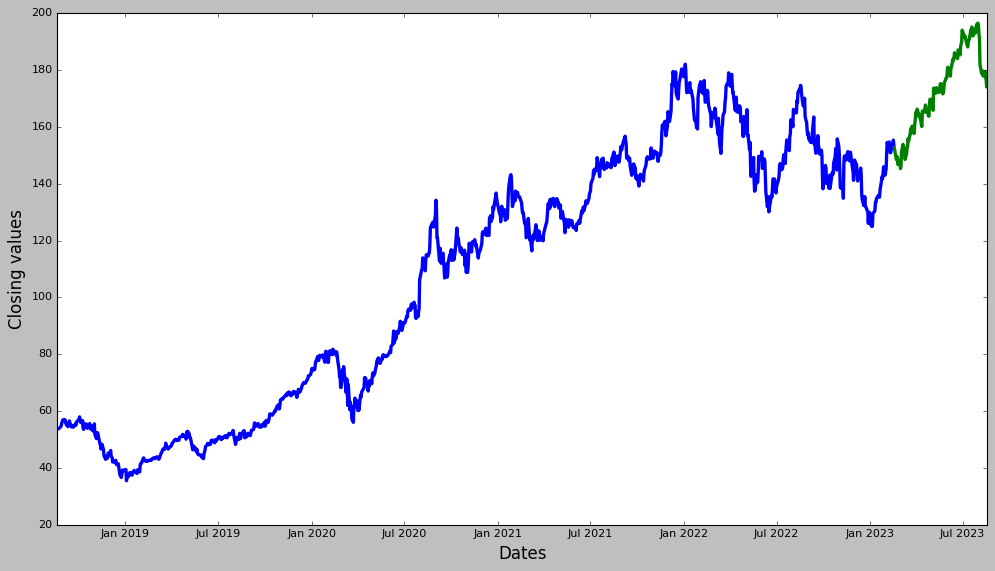

In [140]:
plt.figure(figsize=(15,8))
train_data=df.Close[0:-126]
test_data=df.Close[-126:]
plt.plot(train_data,c='blue',linewidth=3)
plt.plot(test_data,c='green',linewidth=3)
plt.xlabel('Dates',fontsize=15)
plt.ylabel('Closing values',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [141]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [142]:
history=[x for x in train_data]

In [143]:
model=ARIMA(history,order=(1,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2577.880
Date:                Wed, 23 Aug 2023   AIC                           5161.761
Time:                        13:11:37   BIC                           5176.853
Sample:                             0   HQIC                          5167.463
                               - 1132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3580      0.289      1.239      0.215      -0.208       0.924
ma.L1         -0.4208      0.283     -1.486      0.137      -0.976       0.134
sigma2         5.5882      0.154     36.184      0.000       5.286       5.891
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               371.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              10.89   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
model.forecast()[0]

153.7505133712452

In [145]:
test_data[0]

152.5500031

In [146]:
mean_squared_error([test_data[0]],model.forecast())
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

1.2005102712452072

In [147]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [162]:
def evaluate_models(dataset, test,p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = train_arima_model(dataset, test_data, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        print(f'ARIMA{order} RMSE = {rmse:.3f}')
                except:
                    continue
    print(f'Best ARIMA{best_cfg} RMSE = {best_score:.3f}')





In [163]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE = 64.453
ARIMA(0, 0, 1) RMSE = 32.926
ARIMA(0, 0, 2) RMSE = 18.909
ARIMA(0, 1, 0) RMSE = 2.097
ARIMA(0, 2, 1) RMSE = 2.093
ARIMA(1, 2, 2) RMSE = 2.086
Best ARIMA(1, 2, 2) RMSE = 2.086


In [150]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 2.1179298097685524


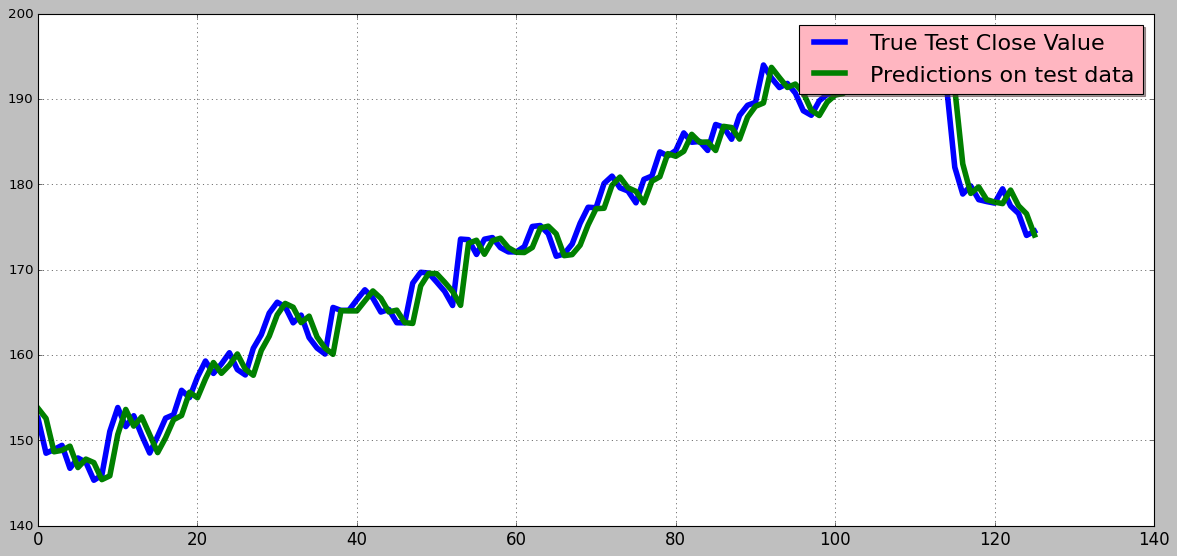

In [151]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [152]:
fc_series = pd.Series(predictions, index=test_data.index)

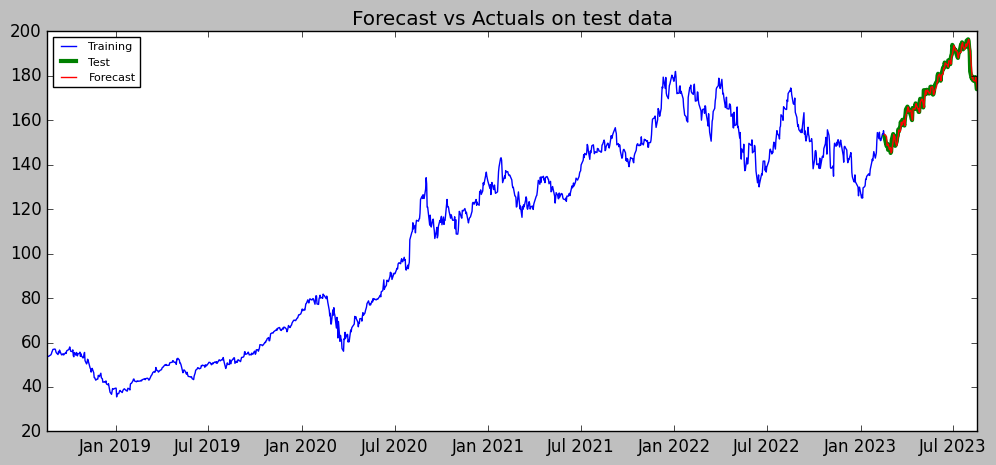

In [153]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

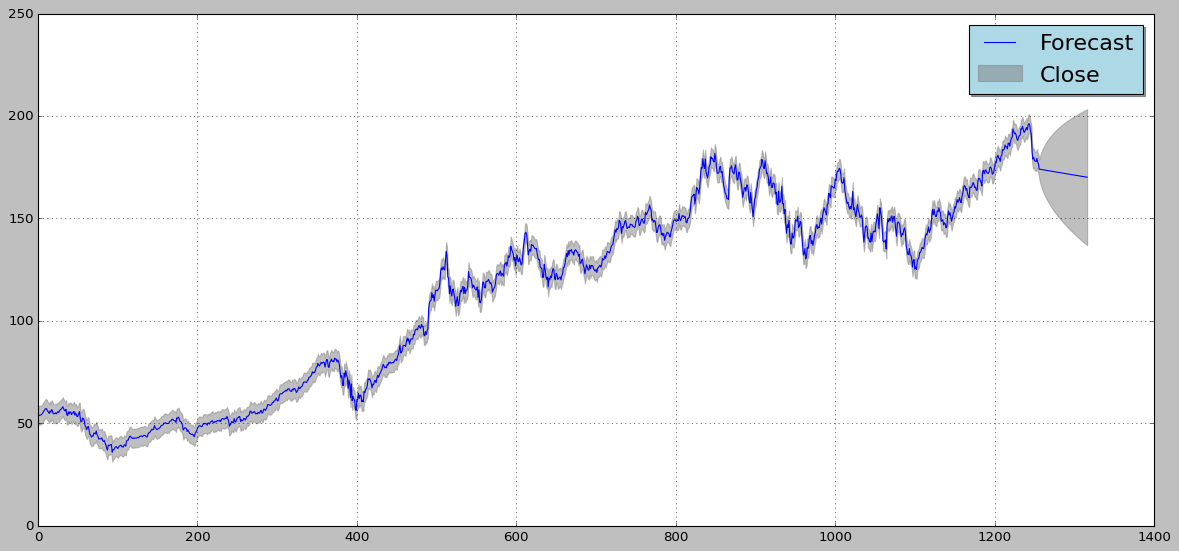

In [154]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [155]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 2.085543600179246


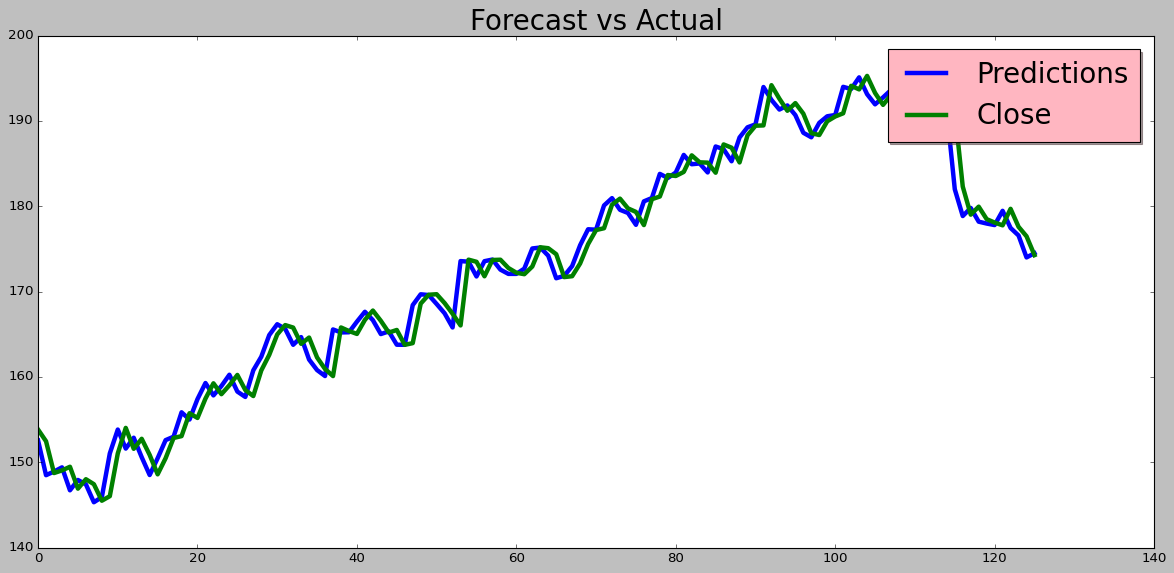

In [166]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(len(test_data)),test_data, label = 'Predictions', linewidth = 4)
plt.plot(range(len(predictions)), predictions,label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')